In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [35]:
url = "/kaggle/input/wine-reviews/winemag-data-130k-v2.csv"
dataset = pd.read_csv(url)

In [36]:
dataset.shape

(129971, 14)

In [37]:
dataset.head(15)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [39]:
dataset.duplicated().sum()

0

In [40]:
dataset.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [41]:
dataset.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [42]:
dataset=dataset.drop(['taster_twitter_handle','region_2'],axis=1)

In [43]:
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   129971 non-null  int64  
 1   country      129908 non-null  object 
 2   description  129971 non-null  object 
 3   designation  92506 non-null   object 
 4   points       129971 non-null  int64  
 5   price        120975 non-null  float64
 6   province     129908 non-null  object 
 7   region_1     108724 non-null  object 
 8   taster_name  103727 non-null  object 
 9   title        129971 non-null  object 
 10  variety      129970 non-null  object 
 11  winery       129971 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 11.9+ MB


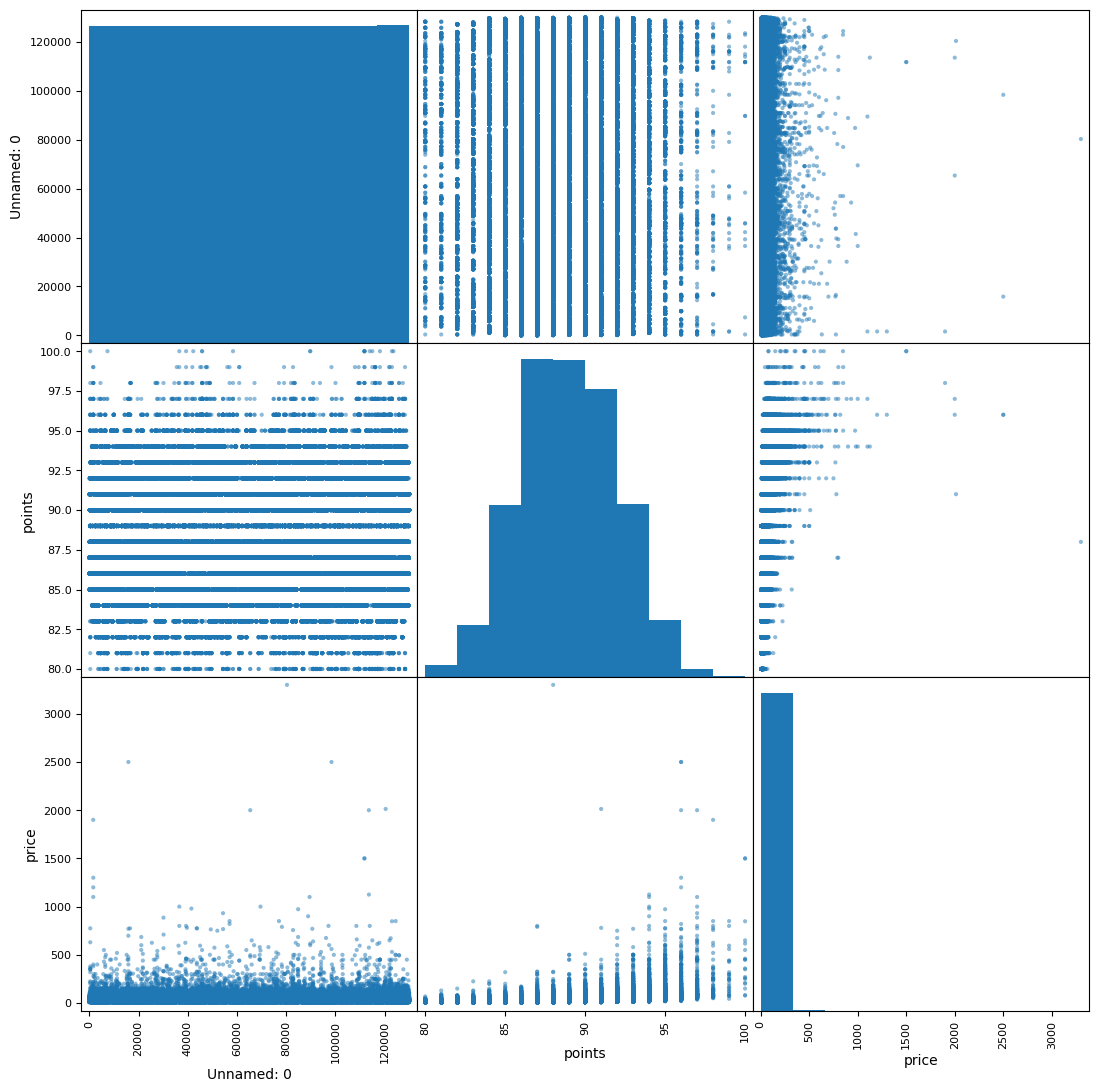

In [45]:
pd.plotting.scatter_matrix(dataset, figsize = (13, 13))
pass

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   129971 non-null  int64  
 1   country      129908 non-null  object 
 2   description  129971 non-null  object 
 3   designation  92506 non-null   object 
 4   points       129971 non-null  int64  
 5   price        120975 non-null  float64
 6   province     129908 non-null  object 
 7   region_1     108724 non-null  object 
 8   taster_name  103727 non-null  object 
 9   title        129971 non-null  object 
 10  variety      129970 non-null  object 
 11  winery       129971 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 11.9+ MB


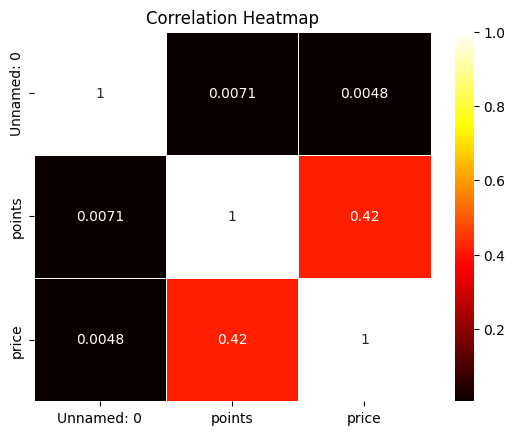

In [47]:
cor = dataset.select_dtypes(exclude=object).corr()
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

In [49]:
dataset['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      7.0
0.010      8.0
0.050     10.0
0.100     12.0
0.500     25.0
0.900     65.0
0.950     85.0
0.990    155.0
0.995    225.0
Name: price, dtype: float64

In [50]:
dataset['points'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    81.0
0.010    82.0
0.050    84.0
0.100    85.0
0.500    88.0
0.900    92.0
0.950    93.0
0.990    95.0
0.995    96.0
Name: points, dtype: float64

In [ ]:
dataset = pd.get_dummies(dataset)

In [ ]:
dataset_normalized = (dataset - dataset.mean(axis = 0)) / dataset.std(axis = 0)
dataset_normalized.describe()

In [ ]:
x = dataset_normalized.drop(['price'], axis=1)
y = dataset['price']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

x_train = imputer.fit_transform(x_train)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

In [ ]:
y_train_predict = lasso.predict(x_train)
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

In [ ]:
x_test = imputer.fit_transform(x_test)

In [ ]:

y_train_predict = lasso.predict(x_train)
y_test_predict  = lasso.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

In [ ]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

In [ ]:
lasso.score(x_train, y_train)

In [ ]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
reg.fit(x_train, y_train)

predictions = reg.predict(x_test)

#RMSE
np.sqrt(mean_squared_error(y_test, predictions))